# Import libraries and load dataset

In [1]:
# Step 1: Import libraries and load data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('wdbc-data.csv', header=None)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Dataset Column Labelling 

In [3]:
# Step 2: Assign a title to each column of the dataset
column_names = ['id', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
                'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
                'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
                'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness',
                'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry',
                'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter',
                'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity',
                'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
df.columns = column_names

In [4]:
df.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Class Label Encoding

In [5]:
# Renaming diagnosis column attributes as 0 for benign and 1 for malignant
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis'].map({'B': 0, 'M': 1})

In [6]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


# Data Preprocessing

In [7]:
# Step 3: Data preprocessing (Binarization and Feature selection using selectkbest)
# Binarization scaling using mean value as threshold
threshold = X.mean().values.reshape(1, -1)
binarizer = Binarizer(threshold=threshold)
X_binarized = binarizer.transform(X)

# Feature selection using SelectKBest with chi2 scoring function
k_best_features = 20
feature_selector = SelectKBest(chi2, k=k_best_features)
X_selected = feature_selector.fit_transform(X_binarized, y)

In [8]:
# Print the names of the selected features
selected_indices = feature_selector.get_support(indices=True)
selected_features = np.array(X.columns)[selected_indices]
print("Selected Features:")
print(selected_features)

Selected Features:
['mean_radius' 'mean_texture' 'mean_perimeter' 'mean_area'
 'mean_compactness' 'mean_concavity' 'mean_concave_points' 'se_radius'
 'se_perimeter' 'se_area' 'se_compactness' 'se_concavity'
 'se_concave_points' 'worst_radius' 'worst_texture' 'worst_perimeter'
 'worst_area' 'worst_compactness' 'worst_concavity' 'worst_concave_points']


In [9]:
# Step 4: Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Training using Logistic Regression

In [10]:
# Step 5: Training using Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Print the logistic regression model training accuracy 
logreg_train_pred = logreg_model.predict(X_train)
logreg_train_accuracy = accuracy_score(y_train, logreg_train_pred)
logreg_train_accuracy_percentage = logreg_train_accuracy * 100
print("Logistic Regression Training Accuracy: {:.2f}%".format(logreg_train_accuracy_percentage))

Logistic Regression Training Accuracy: 97.14%


# Training using Random Forest

In [11]:
# Step 6: Training using Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Print the random forest model training accuracy 
rf_train_pred = rf_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_train_accuracy_percentage = rf_train_accuracy * 100
print("Random Forest Training Accuracy: {:.2f}%".format(rf_train_accuracy_percentage))

Random Forest Training Accuracy: 99.34%


# Training using Naive Bayes

In [12]:
# Step 6: Training using Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Print the random naive Bayes training accuracy 
nb_train_pred = nb_model.predict(X_train)
nb_train_accuracy = accuracy_score(y_train, nb_train_pred)
nb_train_accuracy_percentage = nb_train_accuracy * 100
print("Naive Bayes Training Accuracy: {:.2f}%".format(nb_train_accuracy_percentage))

Naive Bayes Training Accuracy: 91.43%


In [13]:
# Logistic Regression prediction
y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression prediction:")
print(y_pred_logreg)

Logistic Regression prediction:
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


In [14]:
# Random Forest prediction
y_pred_rf = rf_model.predict(X_test)
print("Random Forest prediction:")
print(y_pred_rf)

Random Forest prediction:
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


In [15]:
# Naive Bayes prediction
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes prediction:")
print(y_pred_nb)

Naive Bayes prediction:
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1
 0 0 1]


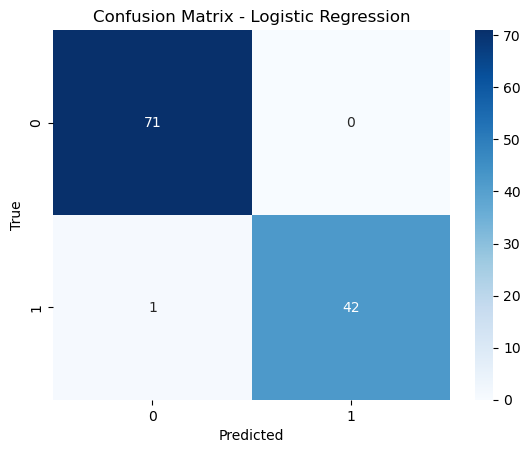

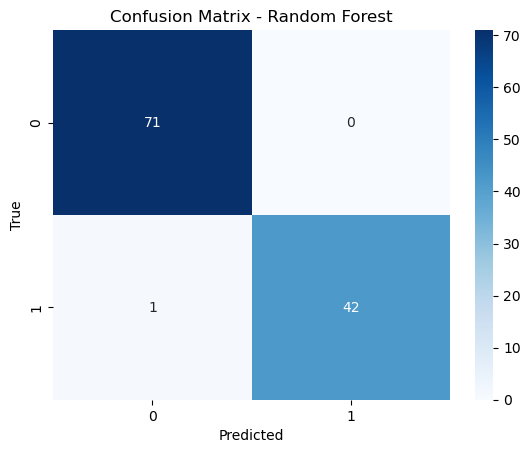

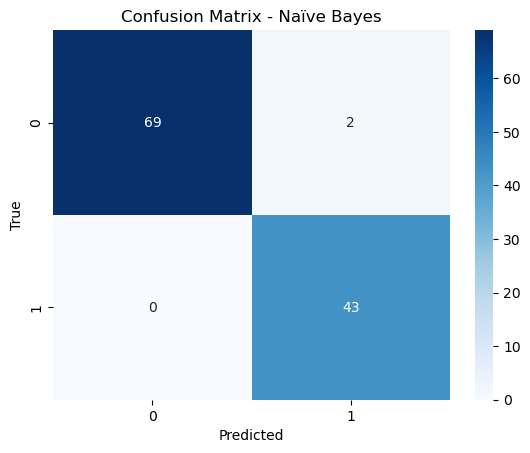

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plotting confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Plotting confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Plotting confusion matrix for Naïve Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naïve Bayes')
plt.show()


In [17]:
# Model evaluation based on prediction
# Calculate accuracy scores and classification reports
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

classification_report_logreg = classification_report(y_test, y_pred_logreg)
classification_report_rf = classification_report(y_test, y_pred_rf)
classification_report_nb = classification_report(y_test, y_pred_nb)

print("Logistic Regression Accuracy:", accuracy_logreg)
print("Logistic Regression Classification Report:")
print(classification_report_logreg)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report_rf)

print("Naïve Bayes Accuracy:", accuracy_nb)
print("Naïve Bayes Classification Report:")
print(classification_report_nb)

Logistic Regression Accuracy: 0.9912280701754386
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Random Forest Accuracy: 0.9912280701754386
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Naïve Bayes Accuracy: 0.9824561403508771
Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99

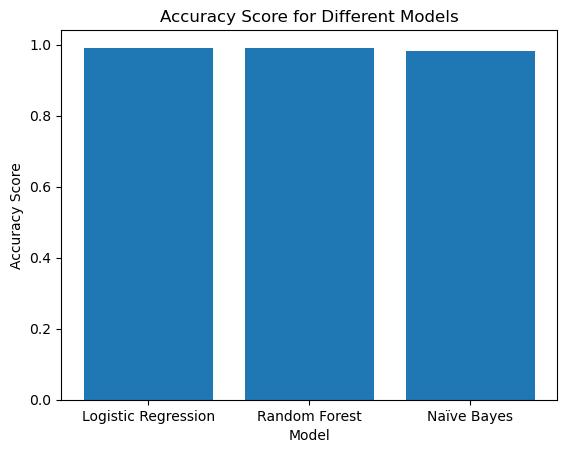

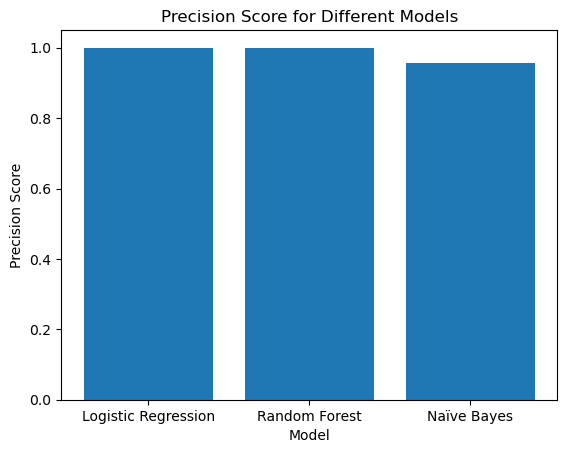

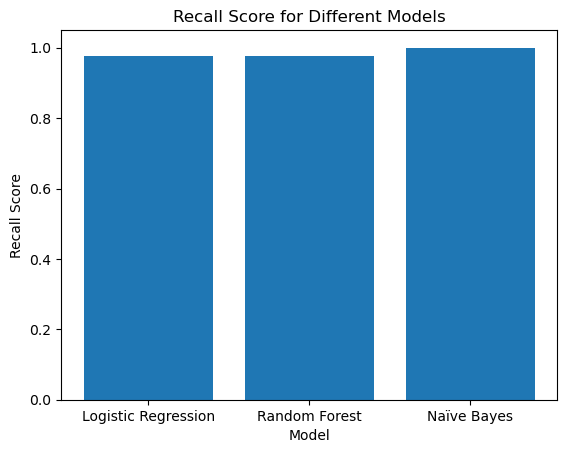

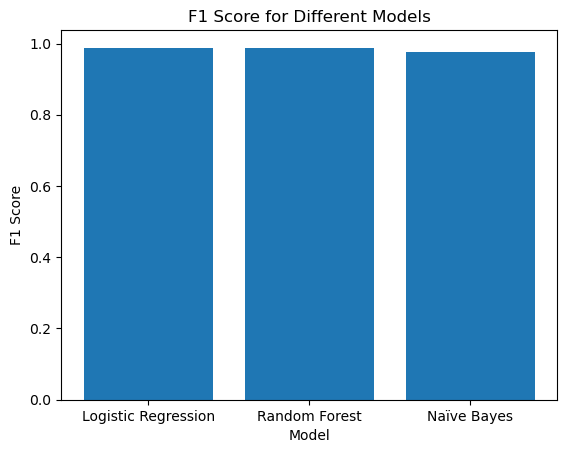

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# List of models
models = ['Logistic Regression', 'Random Forest', 'Naïve Bayes']

# List of metric scores for each model
accuracy_scores = [accuracy_logreg, accuracy_rf, accuracy_nb]

# Calculate precision scores for each model
precision_scores = [precision_score(y_test, y_pred_logreg), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_nb)]

# Calculate recall scores for each model
recall_scores = [recall_score(y_test, y_pred_logreg), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_nb)]

# Calculate F1 scores for each model
f1_scores = [f1_score(y_test, y_pred_logreg), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_nb)]

# Calculate confusion matrices for each model
confusion_matrices = [confusion_matrix(y_test, y_pred_logreg), confusion_matrix(y_test, y_pred_rf), confusion_matrix(y_test, y_pred_nb)]

# Create a bar graph for accuracy scores
plt.bar(models, accuracy_scores)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Models')
plt.show()

# Create a bar graph for precision scores
plt.bar(models, precision_scores)
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Precision Score for Different Models')
plt.show()

# Create a bar graph for recall scores
plt.bar(models, recall_scores)
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.title('Recall Score for Different Models')
plt.show()

# Create a bar graph for F1 scores
plt.bar(models, f1_scores)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Models')
plt.show()


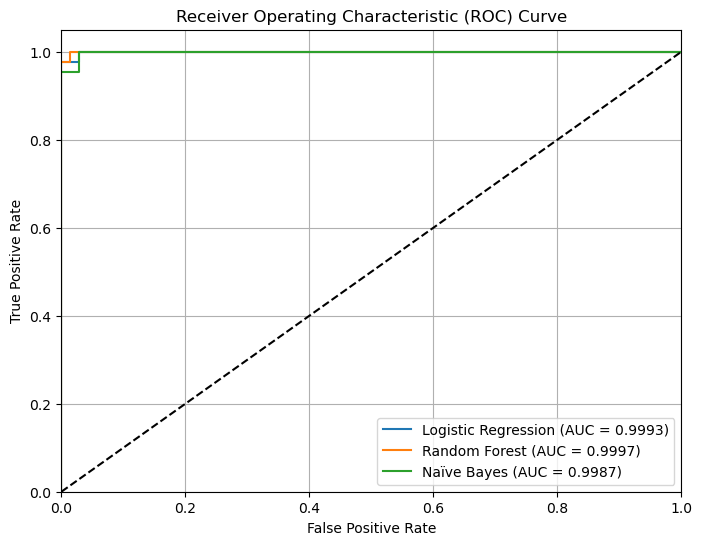

In [19]:
# Import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curves and AUC for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_model.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])

auc_logreg = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:,1])
auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
auc_nb = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:,1])

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naïve Bayes (AUC = {auc_nb:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Saving the Trained Models

In [20]:
# Saving the Logistic Regression model
import joblib

logreg_model_filename = 'trained_logreg_model.joblib'
joblib.dump(logreg_model, logreg_model_filename)
print("Trained Logistic Regression model has been saved as:", logreg_model_filename)

Trained Logistic Regression model has been saved as: trained_logreg_model.joblib


In [21]:
# Saving the Random Forest model
rf_model_filename = 'trained_rf_model.joblib'
joblib.dump(rf_model, rf_model_filename)
print("Trained Random Forest model has been saved as:", rf_model_filename)

Trained Random Forest model has been saved as: trained_rf_model.joblib


In [22]:
# Saving the Naive Bayes model
nb_model_filename = 'trained_nb_model.joblib'
joblib.dump(nb_model, nb_model_filename)
print("Trained Naive Bayes model has been saved as:", nb_model_filename)

Trained Naive Bayes model has been saved as: trained_nb_model.joblib


In [ ]:
# To load the saved models
logreg_model = joblib.load('trained_logreg_model.joblib')
nb_model = joblib.load('trained_nb_model.joblib')
rf_model = joblib.load('trained_rf_model.joblib')